-- **Mini Project** --

***Introduction***

As an intermediary between young entrepreneurs and companies, Staffme is the bridge platform for young people who cannot find a job.  Targeting 18-30 year olds and covering a wide range of professions, the StaffMe platform offers companies a flexible service that responds to needs in a different way to more traditional solutions such as interim work. More broadly, its ambition is to profoundly transform the temporary employment market by enabling users of the platform to gain in skills, and therefore employability.

StaffMe is positioned as a recruitment tool with a prequalification of profiles during a video interview, an intelligent algorithm to allow a perfect match between company offers and candidate's profiles, and the sending of assignments to users via the StaffMe mobile application or via Messenger.

***Librairies***

In [ ]:
!pip install plotly==4.8.2

In [2]:
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import math as m
import numpy as np
import plotly
import plotly.express as px
from plotly.offline import plot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
path = 'C:/Users/ikram/Downloads'
os.chdir(path)

In [570]:
bi = pd.read_excel('test_technique.xlsx', sep=",")

**1- Data Description**

The cross-section database is provided by Staffme company containing informations about characteristic of staffers and their missions. The number of rows in this dataset is 150164 and the number of columns in dataset is 14 and it describe as follows : 

In [331]:
print('bi')
bi.info()
print('------------------')

bi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150164 entries, 0 to 150163
Data columns (total 14 columns):
id                    150164 non-null int64
month_created         150164 non-null datetime64[ns]
month_called          19253 non-null datetime64[ns]
birth_date            108445 non-null float64
enabled               150164 non-null int64
registration_phase    150164 non-null object
rating                150164 non-null object
siret_verified        150164 non-null object
staffme_reference     92076 non-null object
postal_code           98855 non-null object
school_type           68153 non-null object
degree_level_name     68153 non-null object
nb_ok_for_task        150164 non-null int64
nb_tasks_done         150164 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 16.0+ MB
------------------


In [571]:
bi.head(5)

,id,month_created,month_called,birth_date,enabled,registration_phase,rating,siret_verified,staffme_reference,postal_code,school_type,degree_level_name,nb_ok_for_task,nb_tasks_done
0,57043,2019-01-01,NaT,1075.0,0,2,0.0,no,Un proche non-staffer m'en a parlé,92110,NaN,NaN,0,0
1,57044,2019-01-01,NaT,NaN,1,1,0.0,not_checked,NaN,NaN,NaN,NaN,0,0
2,57045,2019-01-01,NaT,NaN,1,1,0.0,not_checked,NaN,NaN,NaN,NaN,0,0
3,57046,2019-01-01,2019-01-01,2000.0,1,3,43954.0,yes_auto,Un proche non-staffer m'en a parlé,94310,NaN,NaN,1,0
4,57047,2019-01-01,NaT,NaN,1,1,0.0,not_checked,NaN,NaN,NaN,NaN,0,0


***Data preprocessing***

Missing values

In [334]:
bi.isna().sum()

id                         0
month_created              0
month_called          130911
birth_date             41719
enabled                    0
registration_phase         0
rating                     0
siret_verified             0
staffme_reference      58088
postal_code            51309
school_type            82011
degree_level_name      82011
nb_ok_for_task             0
nb_tasks_done              0
dtype: int64

In [585]:
bi=bi.dropna()

In [582]:
##removing all values than are higher the 5 for rating

In [579]:
condition = bi['rating']<=5.0

In [581]:
bi=bi.loc[condition]

- Creating new variables

In order to get an idea about the age districution of staffers, we've created the age variable

In [587]:
bi['birth_date']=bi['birth_date'].astype(int)
date = datetime.datetime.now()
date=date.year
bi['age']= date-bi['birth_date']

- Duration of staffme leader's response

In [588]:
bi['duration']=bi['month_called']-bi['month_created']

**Data Analysis**

- *Age distribution of staffers registered on the website*

In [589]:
h6=pd.cut(bi.age, bins=pd.IntervalIndex.from_tuples([(18, 24), (24, 29), (29, 37)])).value_counts()
plt.figure(figsize=(26,14))
df1 = px.data.tips()
fig = px.pie(h6, values=h6, names=['(18, 24]','(24, 29]','(29, 37]'], color_discrete_sequence=px.colors.qualitative.Pastel2, title='Age distribution of staffers')
fig.show()

<Figure size 1872x1008 with 0 Axes>

This graph illustrates the distribution of staff members by age group. 10930 of the staffers are between 18 and 23 years old while 28.5% are between 24 and 29 years old

- *Frequency of active staffme members*

In [532]:
h9=bi.groupby(by=['enabled'], as_index = False)['id'].count()
for i in range(len(h)):
    h9['%']= (h9.loc[:i,'id']/sum(h9['id']))*100
df = px.data.tips()
fig = px.pie(h9, values='%', names='enabled', color_discrete_sequence=px.colors.sequential.RdBu, title='Frequency of active staffers')
fig.show()

More than 97.5% are active and connected while just 2.5 are not

- *Frequency of confirmed staffers as contractors*

In [496]:
h=bi.groupby(by=['siret_verified'], as_index = False)['id'].count()
for i in range(len(h)):
    h['%']= (h.loc[:i,'id']/sum(h['id']))*100
df = px.data.tips()
fig = px.pie(h, values='%', names='siret_verified', color_discrete_sequence=px.colors.sequential.RdBu, title='Frequency of confirmed staffers as contractors')
fig.show()

 From the graph above, 83.8 % of staffers are confirmed as contractors by INSEE while 16.2% are not

Text(0.5, 1.0, 'distribution of staffers by field of study')

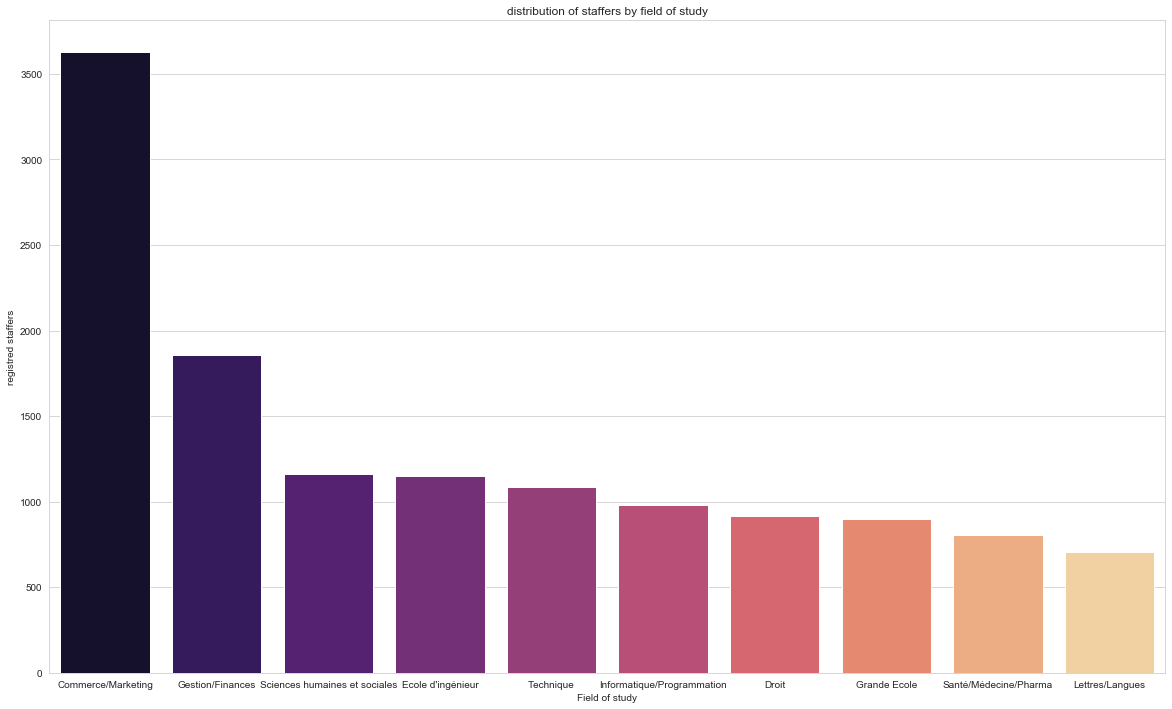

In [495]:
hd= bi.groupby(by=['school_type'], as_index = False)['id'].count().sort_values(by='id',ascending=False)[:10]

plt.figure(figsize=(20,12))
sns.set_style('whitegrid')
sns.barplot(x = hd['school_type'], y =hd['id'] ,  palette= "magma")
plt.xlabel('Field of study')
plt.ylabel('registred staffers')
plt.title('distribution of staffers by field of study' )

Based on the barplot, 3630 of staffers are pursuing studies in marketing , 1855 are in Finance/ Management, 1161 in human ressources and 1147 are engineers

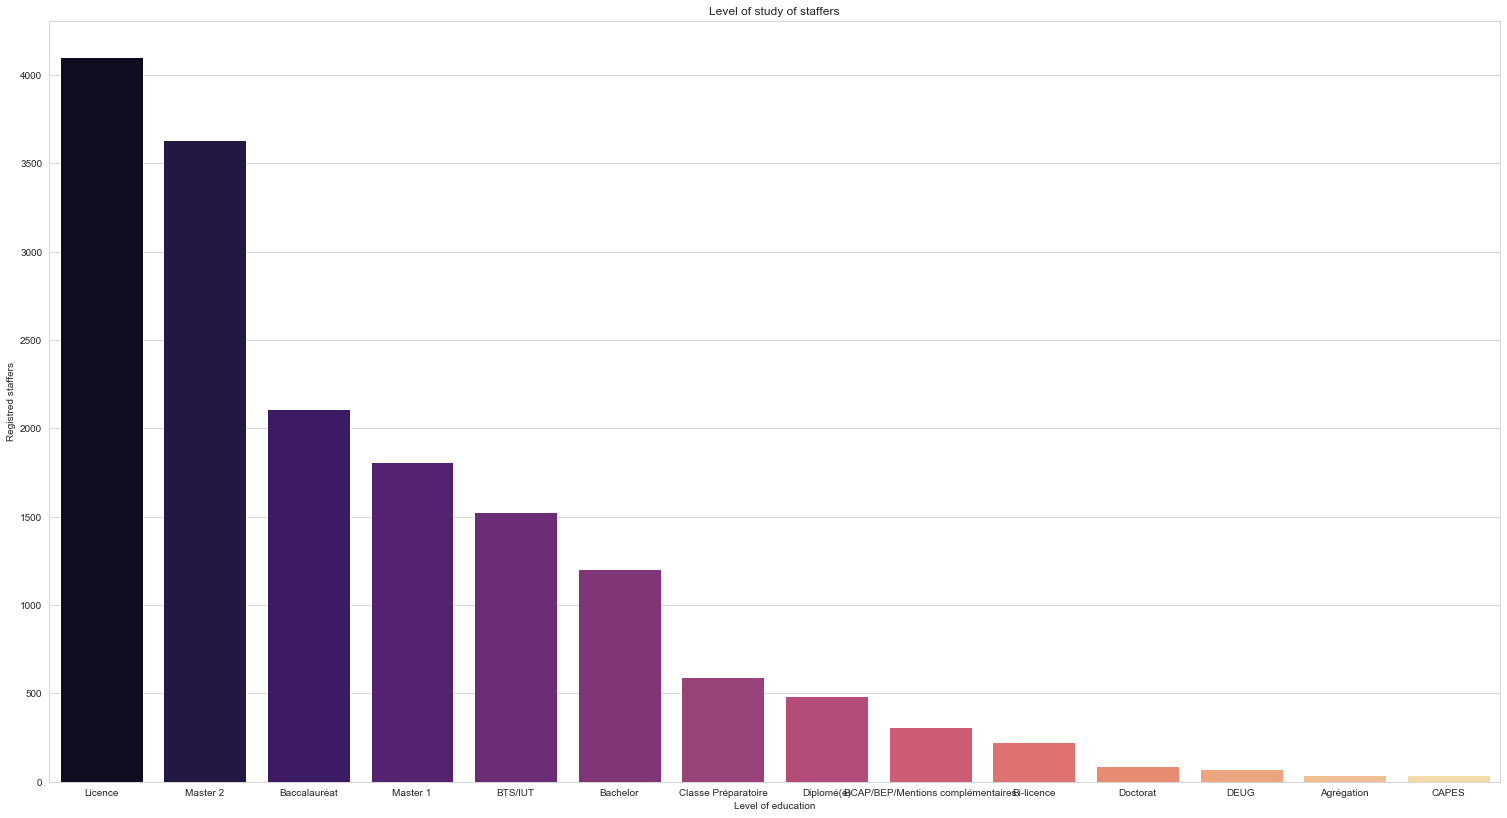

In [498]:
hd1=bi.groupby(by=['degree_level_name'], as_index = False)['id'].count().sort_values(by='id',ascending=False)


plt.figure(figsize=(26,14))
sns.set_style('whitegrid')
sns.barplot(x = hd1['degree_level_name'], y =hd1['id'] ,  palette= "magma")
plt.xlabel('Level of education')
plt.ylabel('Registred staffers')
plt.title('Level of study of staffers' )
plt.show()

- *The 10 best form of advertising*

In [343]:
temp = bi\
         .drop_duplicates('id')\
         ['staffme_reference']\
         .value_counts()

In [345]:
nb_unique_staffers = bi['id'].nunique()

In [346]:
sup_pct = temp\
             .divide(nb_unique_staffers)\
             .multiply(100)\
             .round(2)

In [347]:
sup_top_10 = temp.head(10)

In [348]:
labels = sup_top_10.index.tolist()
values = sup_top_10.tolist()
colors = ['lightslategray',] * len(values)
colors[0:3] = ['crimson'] * 3

In [349]:
colors = ['lightpink',] * 5
colors = 'lightblue'
fig = go.Figure(
    [
        go.Bar(
            x=labels, 
            y=values,
            text=values, 
            textposition='auto',
            marker_color=colors,
        )
    ]
)
fig.update_layout(
    plot_bgcolor='rgb(255,255,255)',
    paper_bgcolor='rgb(255,255,246)',
    title_text='Les méthodes de publicité les plus utilisés' )
fig.show()

Staffme is known by the traditional form of advertising : Word of mouth advertising. Despite if the information are told by a staffme member or a normal person, more than 8862 members were registred due to the fact that they hear about the application from another person. 1771 has found the information by searching in the internet and just 286 had registred by seeing it in social networks.

- *Missions completed by region of residence*

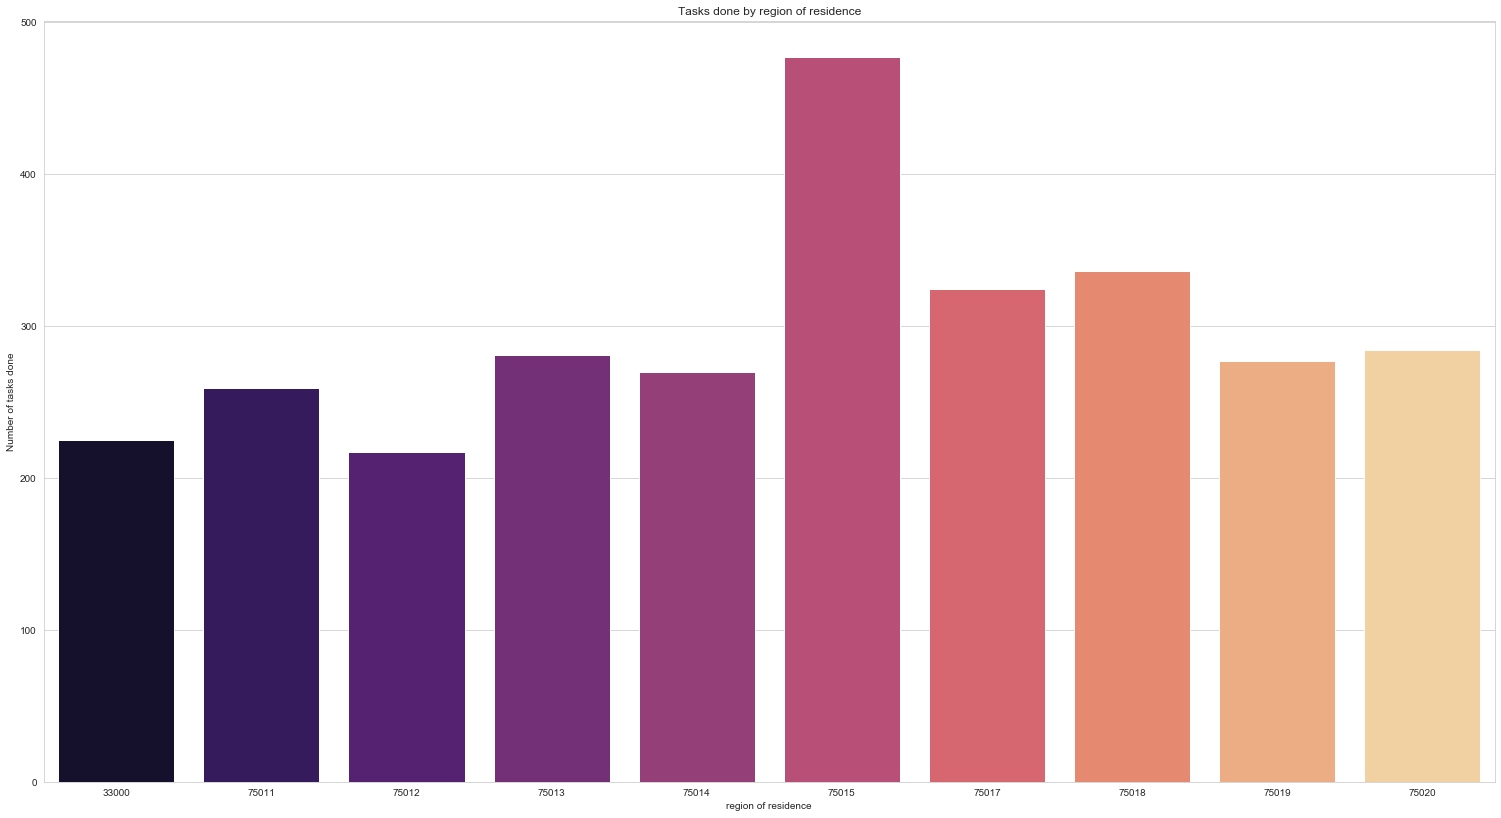

In [543]:
h4=bi.groupby(by=['postal_code'], as_index = False)['nb_tasks_done'].count().sort_values(by='nb_tasks_done',ascending=False)[:10]
plt.figure(figsize=(26,14))
sns.set_style('whitegrid')
sns.barplot(x = h4['postal_code'], y =h4['nb_tasks_done'] ,  palette= "magma")
plt.xlabel('region of residence')
plt.ylabel('Number of tasks done')
plt.title('Tasks done by region of residence' )
plt.show()

More than 4300 of staffme members are living in Ile de France while 317 in Lille, 225 in Bordeaux

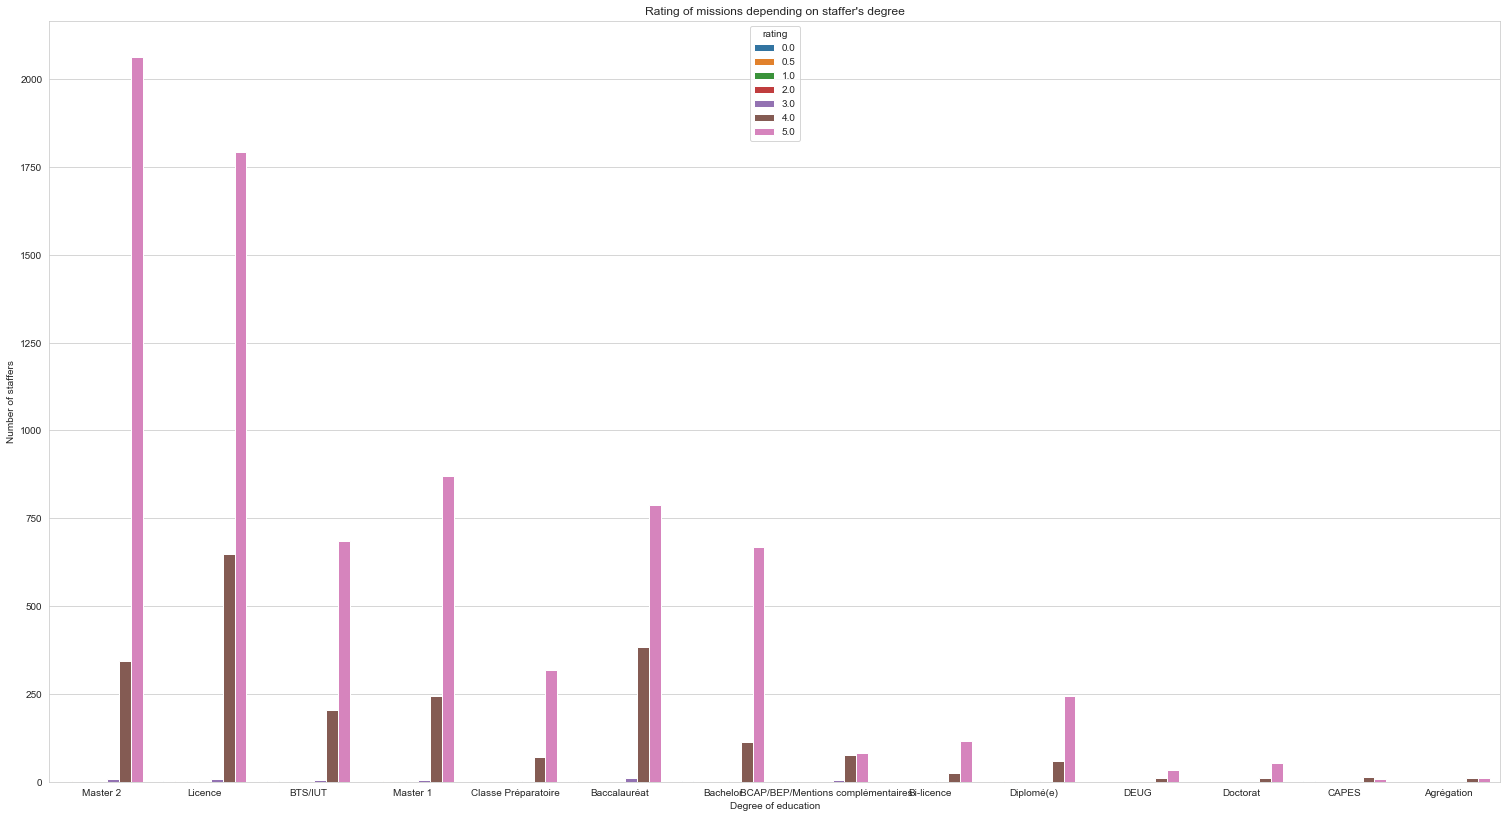

In [633]:
plt.figure(figsize=(26,14))
sns.countplot(x='degree_level_name', hue='rating', data=bi)
plt.xlabel('Degree of education')
plt.ylabel('Number of staffers')
plt.title('Rating of missions depending on staffer\'s degree' )
plt.show()


The higher the level of education, the higher the rating with a certain dispersion.